In [0]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = load_iris()

In [3]:
features = pd.DataFrame(data.data, columns=data.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
tar = pd.Series(data.target)
tar.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

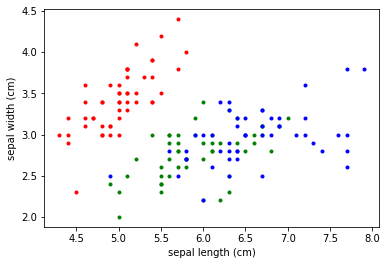

In [6]:
plt.plot(features['sepal length (cm)'][tar==0],features['sepal width (cm)'][tar==0],'r.')
plt.plot(features['sepal length (cm)'][tar==1],features['sepal width (cm)'][tar==1],'g.')
plt.plot(features['sepal length (cm)'][tar==2],features['sepal width (cm)'][tar==2],'b.')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [7]:
from sklearn import preprocessing
features = preprocessing.StandardScaler().fit(features).transform(features.astype(float))
features[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, tar,test_size=0.25, random_state=10)

In [14]:
#checking for different k(s):
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
ks = 15
mean_acc = np.zeros((ks-1))

for n in range(1,ks-1):
    #now training our model
    neigh_prime = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_caps_prime = neigh_prime.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test,y_caps_prime)
print(mean_acc)
k = mean_acc.argmax()+1
print('Max value of K : ',k)

[0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 1.
 0.94736842 0.94736842 0.94736842 0.97368421 0.97368421 1.
 1.         0.        ]
Max value of K :  6


In [0]:
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [16]:
y_caps = neigh.predict(X_test)
print(y_caps)
print(np.asarray(y_test))

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2]


In [17]:
#predicting accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_caps)
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 12]])

In [0]:
from plt_cm import plot_confusion_matrix


Confusion matrix, without normalization
[[11  0  0]
 [ 0 15  0]
 [ 0  0 12]]


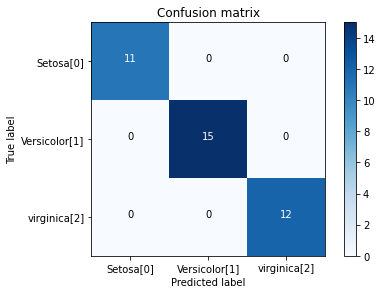

In [19]:
plot_confusion_matrix(cm, classes=['Setosa[0]','Versicolor[1]','virginica[2]'])

In [20]:
print("Accuracy score : {}%".format(round(accuracy_score(y_test, y_caps),2)*100))

Accuracy score : 100.0%
